In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import date

plt.style.use('ggplot')

In [2]:
path = Path.home() / 'OneDrive - Seagroup/mkt/organic_predict/mkt_a1_organic.ftr'
df = pd.read_feather(path)
df.query('grass_date >= "2022-01-01"', inplace=True)
df.fillna(0, inplace=True)
df.head()

,grass_week,grass_month,grass_date,date_type,Organic,Seller Ads,CRM,GG SEO,Offline,Affiliate,...,MiniSpike,spike,spike_date,days_dif_spike,mini_spike_date,days_dif_mini_spike,Tiktok_monthly_a1_minus_m2,Tiktok_monthly_a30_minus_m2,Lazada_monthly_a1_minus_m2,Lazada_monthly_a30_minus_m2
701,2021-12-27,2022-01-01,2022-01-01,Mini-Spike,3323893.0,167849.0,449005.0,356471.0,15709.0,146445.0,...,0,0,15.0,14.0,1.0,0.0,15773232.0,29374307.0,5304120.0,19207951.0
702,2021-12-27,2022-01-01,2022-01-02,BAU,3170228.0,159902.0,379106.0,356488.0,15709.0,61225.0,...,0,0,15.0,13.0,1.0,-1.0,15773232.0,29374307.0,5304120.0,19207951.0
703,2022-01-03,2022-01-01,2022-01-03,BAU,3316517.0,153196.0,352538.0,378356.0,15709.0,65071.0,...,0,0,15.0,12.0,1.0,-2.0,15773232.0,29374307.0,5304120.0,19207951.0
704,2022-01-03,2022-01-01,2022-01-04,BAU,3363558.0,146517.0,327936.0,386246.0,15709.0,63511.0,...,0,0,15.0,11.0,1.0,-3.0,15773232.0,29374307.0,5304120.0,19207951.0
705,2022-01-03,2022-01-01,2022-01-05,BAU,3354620.0,146572.0,313036.0,390190.0,15709.0,65164.0,...,0,0,15.0,10.0,1.0,-4.0,15773232.0,29374307.0,5304120.0,19207951.0


## 1. Describe Trend

Text(0.5, 1.0, 'Line plot')

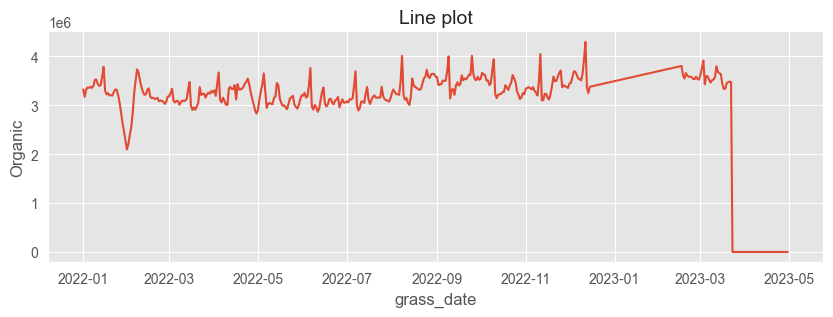

In [3]:
plt.figure(figsize=(10, 3))
ax = sns.lineplot(data=df, x='grass_date', y='Organic')
# ax.set_xlim([date(2022, 3, 1), date(2022, 5, 1)])
ax.set_title('Line plot', fontsize=14)

<AxesSubplot:xlabel='grass_date'>

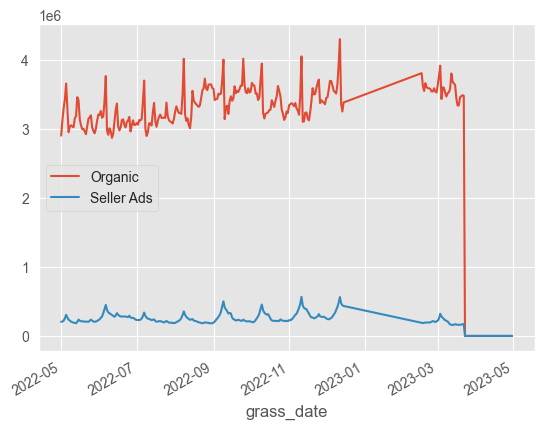

In [4]:
df.query('grass_date >= "2022-05-01"')[['grass_date', 'Organic', 'Seller Ads']].plot(x='grass_date')

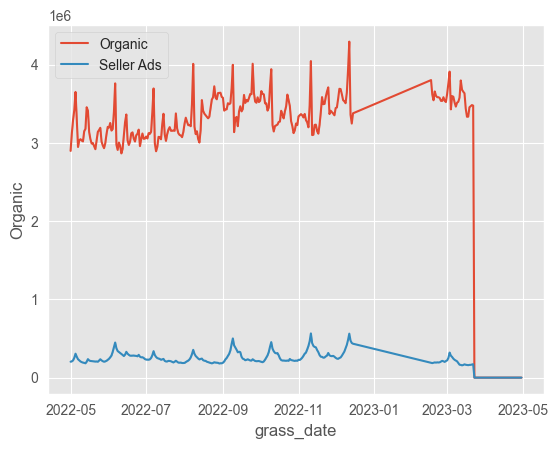

In [5]:
for i in ['Organic', 'Seller Ads']:
    sns.lineplot(data=df.query('grass_date >= "2022-05-01"'), x='grass_date', y=i, label=i)

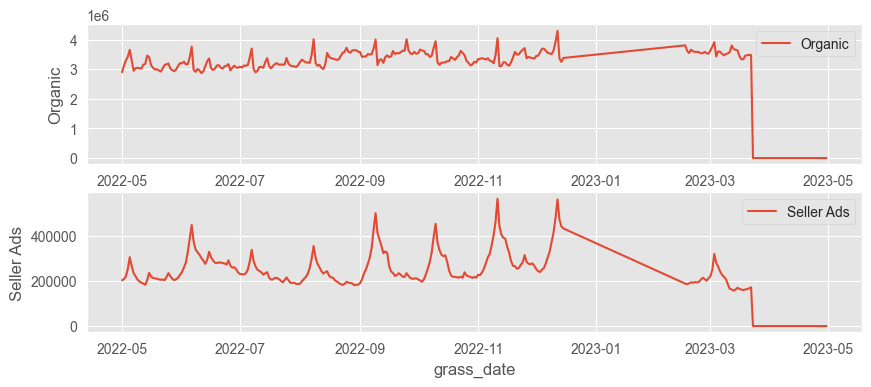

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))
axes = axes.flatten()
for i, v in enumerate(['Organic', 'Seller Ads']):
    sns.lineplot(data=df.query('grass_date >= "2022-05-01"'), x='grass_date', y=v, label=v, ax=axes[i])

## 2. Distribution

<AxesSubplot:xlabel='date_type', ylabel='Organic'>

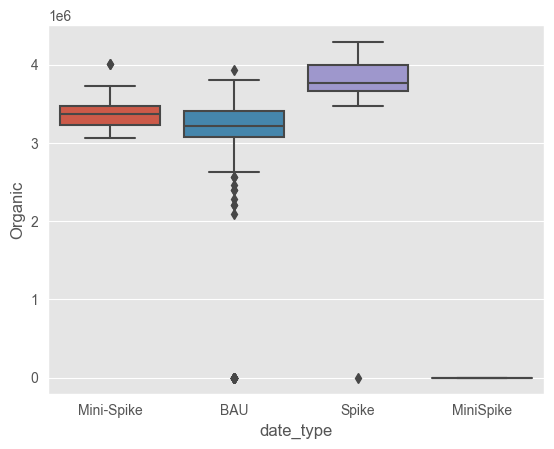

In [7]:
sns.boxplot(data=df, x='date_type', y='Organic')

<AxesSubplot:xlabel='Organic', ylabel='Count'>

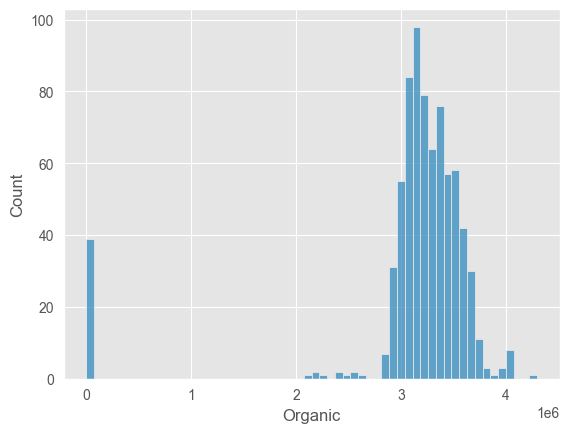

In [8]:
sns.histplot(data=df, x='Organic')

<AxesSubplot:xlabel='Organic', ylabel='Count'>

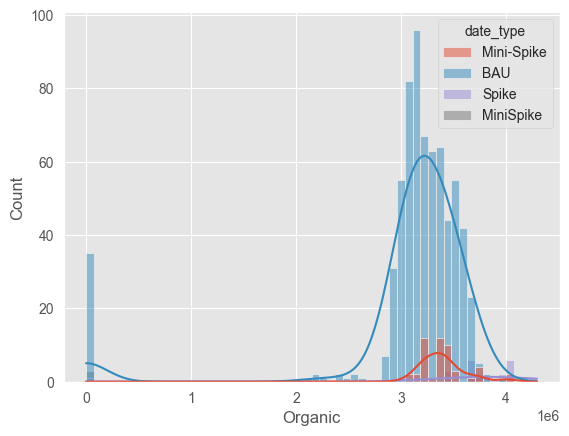

In [9]:
sns.histplot(data=df, x='Organic', kde=True, hue='date_type')

## 3. Categorical Count

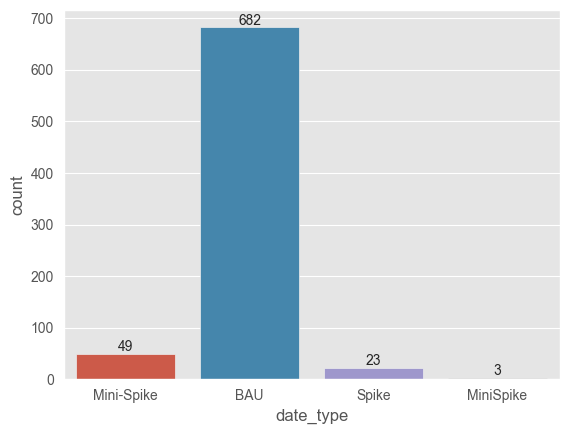

In [10]:
# categorical data type
ax = sns.countplot(data=df, x='date_type')
for i in ax.containers:
    ax.bar_label(i)

In [11]:
df['date_type'].value_counts()

BAU           682
Mini-Spike     49
Spike          23
MiniSpike       3
Name: date_type, dtype: int64

<AxesSubplot:>

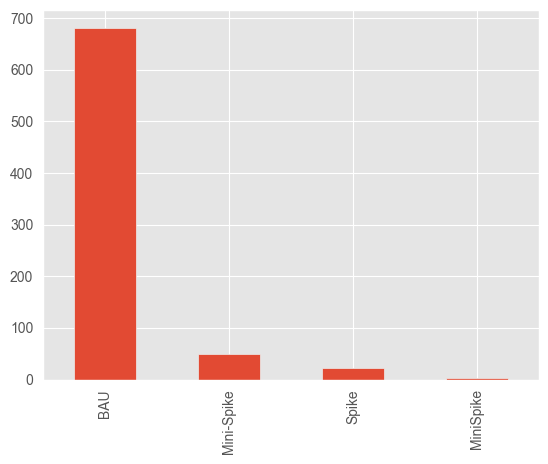

In [12]:
df['date_type'].value_counts().plot(kind='bar')

## 4. Relationships

In [13]:
col = ['Organic', 'CRM', 'Offline']
df[col].corr()

,Organic,CRM,Offline
Organic,1.000000,0.713992,0.080056
CRM,0.713992,1.000000,0.052000
Offline,0.080056,0.052000,1.000000


<AxesSubplot:>

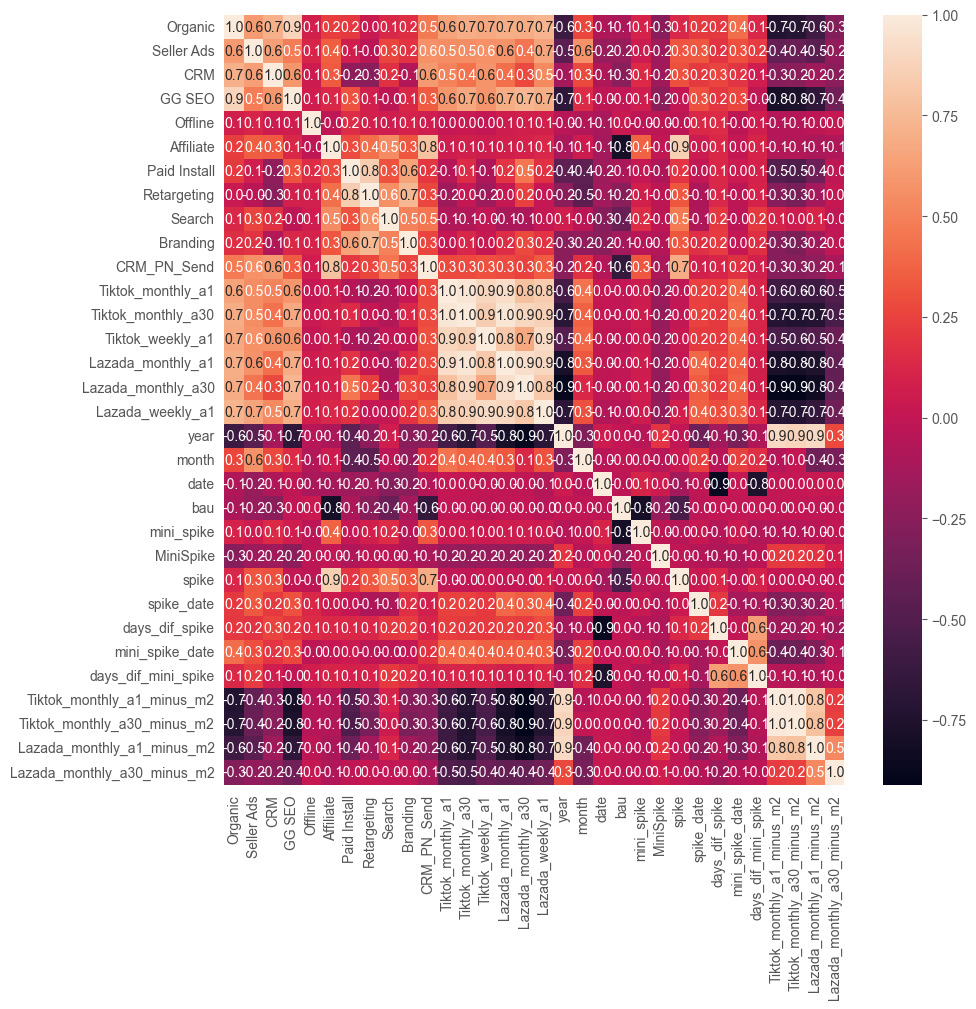

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, fmt='.1f')

<AxesSubplot:xlabel='Organic', ylabel='Affiliate'>

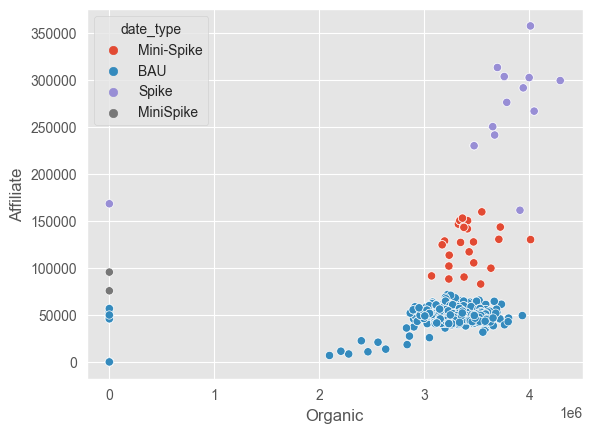

In [15]:
sns.scatterplot(data=df, x='Organic', y='Affiliate', hue='date_type')

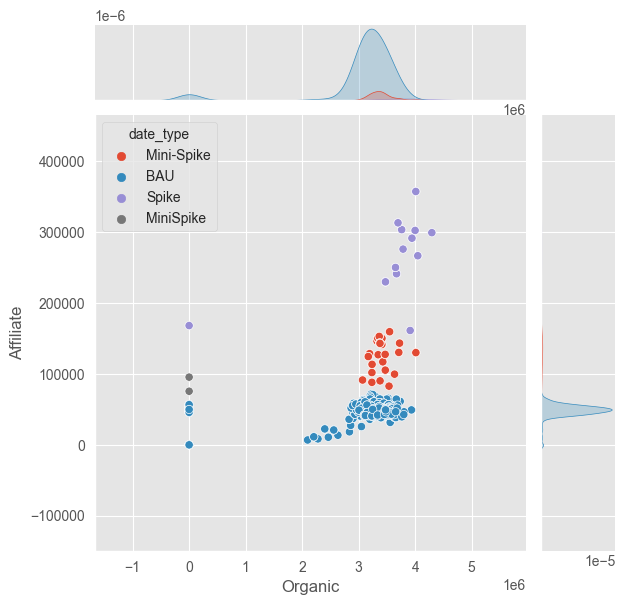

In [16]:
sns.jointplot(data=df, x='Organic', y='Affiliate', hue='date_type')

<AxesSubplot:xlabel='Organic', ylabel='Affiliate'>

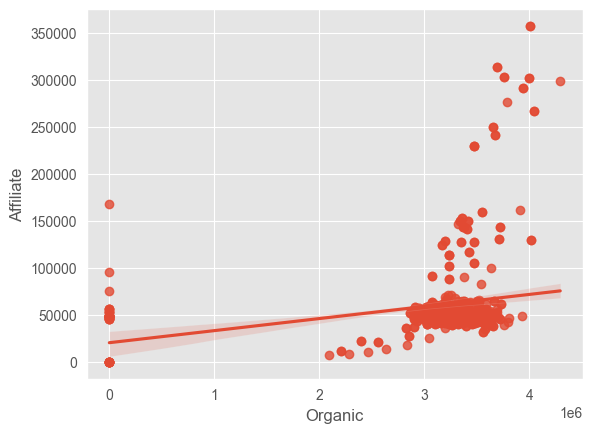

In [17]:
sns.regplot(data=df, x='Organic', y='Affiliate')